# Business Case

The goal of this project is to build a **Machine Learning model** that predicts the **probability of a driver initiating an insurance claim in the following year**.

This dataset helps address **inaccuracies in insurance policy pricing**:

* A **cautious driver** should receive a better premium.
* A **reckless driver** should be charged more based on higher risk.

By accurately predicting claim probability, insurers can design **fairer and more effective pricing strategies**.

# Domian Analysis

The training dataset consists of **595,212 observations** and **59 features**.  

## Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn
wn.filterwarnings("ignore") 
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score

## Importing Data 

In [6]:
df = pd.read_csv("train.csv")
df

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


## Basic Checks

In [9]:
df.shape

(595212, 59)

In [10]:
df.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [12]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Preprocessing

### Dropping Unwanted Data

The feature **"id"** is being dropped because it contains only unique values for each row. Such features do not provide any predictive power for the model and can be safely removed to streamline the dataset.

In [15]:
df.drop('id',axis=1,inplace=True)

## Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()

In [18]:
df.columns

Index(['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      

In [19]:
df.shape

(595212, 58)

In [20]:
df_sc=mn.fit_transform(df.drop("target",axis=1))
df_sc

array([[0.28571429, 0.6       , 0.45454545, ..., 0.        , 0.        ,
        1.        ],
       [0.14285714, 0.4       , 0.63636364, ..., 0.        , 1.        ,
        0.        ],
       [0.71428571, 1.        , 0.81818182, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.14285714, 0.4       , 0.90909091, ..., 0.        , 0.        ,
        0.        ],
       [0.71428571, 0.6       , 0.27272727, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.4       , 0.72727273, ..., 0.        , 0.        ,
        0.        ]])

## Feature Selection 

In [22]:
x_fs=df_sc
y_fs=df.target

Due to **multicollinearity** among the variables, only the **top 10 most relevant features** are being selected to improve model performance and reduce redundancy.

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(x_fs, y_fs)

dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(range(x_fs.shape[1]), columns=['Feature_index'])

featurescores = pd.concat([dfcolumns, dfscores], axis=1)
featurescores.columns = ['Feature_index', 'Scores']

print(featurescores.nlargest(10, 'Scores'))

    Feature_index      Scores
16             16  718.220742
6               6  517.788573
24             24  457.760900
5               5  417.558962
23             23  392.497250
15             15  155.776491
19             19  149.018895
25             25  108.524201
4               4   93.894773
7               7   86.014303


In [25]:
columns_to_add = [16, 6, 24, 5, 23, 15, 19, 25, 4, 7]
column_names = ["ps_ind_16_bin", "ps_ind_06_bin", "ps_car_03_cat",
                "ps_ind_05_cat", "ps_car_02_cat", "ps_ind_15", "ps_reg_01",
                "ps_car_04_cat", "ps_ind_04_cat", "ps_ind_07_bin"]

x_new = x_fs[:, columns_to_add]

x_new_df = pd.DataFrame(x_new, columns=column_names)

print("Original DataFrame:")
print(x_fs)
print("\nNew DataFrame with selected columns:")
print(x_new_df)


Original DataFrame:
[[0.28571429 0.6        0.45454545 ... 0.         0.         1.        ]
 [0.14285714 0.4        0.63636364 ... 0.         1.         0.        ]
 [0.71428571 1.         0.81818182 ... 0.         1.         0.        ]
 ...
 [0.14285714 0.4        0.90909091 ... 0.         0.         0.        ]
 [0.71428571 0.6        0.27272727 ... 1.         0.         0.        ]
 [0.         0.4        0.72727273 ... 0.         0.         0.        ]]

New DataFrame with selected columns:
        ps_ind_16_bin  ps_ind_06_bin  ps_car_03_cat  ps_ind_05_cat  \
0                 1.0            1.0            0.0            0.0   
1                 0.0            0.0            0.0            0.0   
2                 0.0            0.0            0.0            0.0   
3                 0.0            0.0            0.0            1.0   
4                 0.0            0.0            0.0            1.0   
...               ...            ...            ...            ...   
595207  

### Code Explanation  

* **Step 1:** Defines a list `columns_to_add` containing the indices of the columns to be selected from the original dataset.  
* **Step 2:** Defines another list `column_names` containing the corresponding column names for the selected columns.  
* **Step 3:** Selects the columns specified by the indices in `columns_to_add` from the original dataset `x` and creates a new NumPy array `x_new`.  
* **Step 4:** Creates a DataFrame `x_new_df` using the selected columns from `x_new` and assigns the column names specified in `column_names`.  
* **Step 5:** Prints the original DataFrame `x` and the new DataFrame `x_new_df` with the selected columns.  


# Model Creation

In [28]:
x=x_new_df
y = df.iloc[:,0:1]

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [30]:
y_train.value_counts()

target
0         401631
1          15017
Name: count, dtype: int64

## Balancing 

In [32]:
sm=SMOTE()
x_sm, y_sm = sm.fit_resample(x_train, y_train)

In [33]:
y_sm.value_counts()

target
0         401631
1         401631
Name: count, dtype: int64

### Linear Regression

In [35]:
lrr= LinearRegression()
lrr.fit(x_sm, y_sm) 

LinearRegression()

In [36]:
y_predict_lrr = lrr.predict(x_test)

In [37]:
print("MSE:",mean_squared_error(y_test,y_predict_lrr))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_predict_lrr)))
print("MAE:", mean_absolute_error(y_test,y_predict_lrr))
r2 = r2_score(y_test,y_predict_lrr)
print("R2:",r2)

MSE: 0.2405748433540893
RMSE: 0.49048429470686344
MAE: 0.48321741871896084
R2: -5.683648712267555


### Logistic Regression

In [39]:
lr = LogisticRegression()
lr.fit(x_sm, y_sm) 

LogisticRegression()

In [40]:
y_predit_lr = lr.predict(x_test)

In [41]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_lr),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_lr))

Test Score

accuracy_score 0.6234851369816984 

classification_report
               precision    recall  f1-score   support

           0       0.97      0.63      0.76    171887
           1       0.05      0.52      0.09      6677

    accuracy                           0.62    178564
   macro avg       0.51      0.58      0.43    178564
weighted avg       0.94      0.62      0.74    178564



Using **Cochran’s formula**, I calculated the minimum sample size needed for statistical reliability. For this dataset with **595,212 rows**, a sample of **5,000 rows** was selected. This ensures the subset is **representative of the population** while keeping computation feasible for heavy algorithms like SVM and Decision Trees.

In [43]:
newdf = pd.concat([x_new_df, y], axis=1)

In [44]:
newdf

,ps_ind_16_bin,ps_ind_06_bin,ps_car_03_cat,ps_ind_05_cat,ps_car_02_cat,ps_ind_15,ps_reg_01,ps_car_04_cat,ps_ind_04_cat,ps_ind_07_bin,target
0,1.0,1.0,0.0,0.0,0.0,0.0,0.111111,1.0,0.142857,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.142857,1.0,0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.142857,1.0,0
3,0.0,0.0,0.0,1.0,0.5,1.0,0.111111,1.0,0.142857,0.0,0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.333333,0.0,0.142857,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
595207,0.0,0.0,0.0,0.0,0.0,1.0,0.166667,1.0,0.142857,0.0,0
595208,0.0,0.0,0.0,0.0,0.0,1.0,0.388889,0.0,0.142857,0.0,0
595209,0.0,0.0,0.0,1.0,0.0,1.0,0.111111,0.0,0.142857,0.0,0
595210,0.0,0.0,0.0,0.0,0.0,1.0,0.222222,0.0,0.142857,1.0,0


In [156]:
kmeans = KMeans(n_clusters=100, random_state=42)
kmeans.fit(newdf)
cluster_labels = kmeans.labels_

cluster_centers = kmeans.cluster_centers_
representatives = []
for cluster_id in pd.unique(cluster_labels):
    cluster_points = newdf[cluster_labels == cluster_id]
    representative_index = (cluster_points.values - cluster_centers[cluster_id]).ptp(axis=1).argmin()
    representatives.append(cluster_points.iloc[representative_index])

desired_sample_size = 5000 
sampled_indices = []
for representative in representatives:
    distances = ((newdf.values - representative.values) ** 2).sum(axis=1) ** 0.5
    cluster_indices = distances.argsort()[:int(desired_sample_size / len(representatives))]
    sampled_indices.extend(cluster_indices)

sampled_data = newdf.iloc[sampled_indices]

In [46]:
sampled_data

,ps_ind_16_bin,ps_ind_06_bin,ps_car_03_cat,ps_ind_05_cat,ps_car_02_cat,ps_ind_15,ps_reg_01,ps_car_04_cat,ps_ind_04_cat,ps_ind_07_bin,target
541901,1.0,1.0,0.111111,0.0,0.5,0.0,0.388889,1.0,0.285714,0.0,0
217091,1.0,1.0,0.111111,0.0,0.5,0.0,0.444444,1.0,0.285714,0.0,0
594414,1.0,1.0,0.111111,0.0,0.5,0.0,0.444444,1.0,0.285714,0.0,0
369937,1.0,1.0,0.000000,0.0,0.5,0.0,0.388889,1.0,0.285714,0.0,0
252965,1.0,1.0,0.000000,0.0,0.5,0.0,0.444444,1.0,0.285714,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
347192,0.0,0.0,0.000000,0.0,0.5,1.0,0.166667,1.0,0.142857,1.0,1
106693,0.0,0.0,0.000000,0.0,0.5,1.0,0.166667,1.0,0.142857,1.0,1
523064,0.0,0.0,0.000000,0.0,0.5,1.0,0.166667,1.0,0.142857,1.0,1
565427,0.0,0.0,0.000000,0.0,0.5,1.0,0.166667,1.0,0.142857,1.0,1


## Again Model Creation

In [48]:
x_rfs=sampled_data.drop("target",axis=1)
y_rfs=sampled_data.iloc[:,-1:]

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x_rfs,y_rfs,test_size=0.3,random_state=10)

In [50]:
y_train.value_counts()

target
0         3152
1          348
Name: count, dtype: int64

## Again Balancing

In [52]:
smote=SMOTE(sampling_strategy='auto', random_state=42)
x_rsm,y_rsm=smote.fit_resample(x_train,y_train)

In [53]:
y_rsm.value_counts()

target
0         3152
1         3152
Name: count, dtype: int64

### SVM

In [55]:
svm = SVC()
svm.fit(x_rsm,y_rsm)

SVC()

In [56]:
y_predit_svm = svm.predict(x_test)

In [57]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_svm),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_svm))

Test Score

accuracy_score 0.9046666666666666 

classification_report
               precision    recall  f1-score   support

           0       1.00      0.89      0.94      1348
           1       0.52      1.00      0.68       152

    accuracy                           0.90      1500
   macro avg       0.76      0.95      0.81      1500
weighted avg       0.95      0.90      0.92      1500



## Applying GridSearchCV For SVM

In [59]:
params_grid={'C':[0.1,1,10,30,50,70,100],"gamma":[0.1,1,0.01,0.001,0.0001],"random_state":(list(range(1,21)))}

In [60]:
grid=GridSearchCV(svm,params_grid,refit=True,verbose=2,scoring="f1",cv=5)
grid.fit(x_rsm,y_rsm)

Fitting 5 folds for each of 700 candidates, totalling 3500 fits
[CV] END ...................C=0.1, gamma=0.1, random_state=1; total time=   2.2s
[CV] END ...................C=0.1, gamma=0.1, random_state=1; total time=   2.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=1; total time=   2.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=1; total time=   1.8s
[CV] END ...................C=0.1, gamma=0.1, random_state=1; total time=   1.9s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   1.8s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   1.9s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   1.8s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   1.8s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   1.9s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   2.1s
[CV] END ...................C=0.1, gamma=0.1,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 30, 50, 70, 100],
                         'gamma': [0.1, 1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='f1', verbose=2)

In [61]:
grid.best_params_

{'C': 100, 'gamma': 1, 'random_state': 1}

In [62]:
svm=SVC(C=100,gamma=1,random_state=1)
svm_gr=svm.fit(x_rsm,y_rsm)

In [63]:
y_predit_svm_gr = svm_gr.predict(x_test)

In [64]:
accuracy_score(y_test,y_predit_svm_gr)

0.9573333333333334

In [65]:
print(classification_report(y_test,y_predit_svm_gr))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1348
           1       0.71      0.97      0.82       152

    accuracy                           0.96      1500
   macro avg       0.85      0.96      0.90      1500
weighted avg       0.97      0.96      0.96      1500



## Decision Tree 

In [67]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(x_rsm,y_rsm)

DecisionTreeClassifier(random_state=10)

In [68]:
y_predit_dt = dt.predict(x_test)

In [69]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_dt),'\n')
print('classification_report\n',classification_report(y_test,y_predit_dt))

Test Score

accuracy_score 0.9653333333333334 

classification_report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1348
           1       0.76      0.97      0.85       152

    accuracy                           0.97      1500
   macro avg       0.88      0.97      0.92      1500
weighted avg       0.97      0.97      0.97      1500



## Applying GridSearchCV For Decision Tree 

In [71]:
params = {"criterion":("gini","entropy"),
          "splitter":("best", "random"),
          "max_depth":(list(range(1,20))),
          "min_samples_split":[2,3,4],
          "min_samples_leaf":list(range(1,20))}

In [72]:
dt_gr = DecisionTreeClassifier(random_state=10)
dt_grid = GridSearchCV(dt_gr,params,scoring="f1",n_jobs= -1,verbose=2,cv=2)

In [73]:
dt_grid.fit(x_rsm,y_rsm)
best_params = dt_grid.best_params_
print(f"Best paramters: {best_params})")

Fitting 2 folds for each of 4332 candidates, totalling 8664 fits
Best paramters: {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})


In [74]:
dt_grid.best_params_

{'criterion': 'gini',
 'max_depth': 17,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [75]:
dt_grid.best_score_

0.9801643630200778

In [76]:
dt1=DecisionTreeClassifier(criterion= 'gini', max_depth= 17, min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')

In [77]:
dt1.fit(x_rsm,y_rsm)

DecisionTreeClassifier(max_depth=17, splitter='random')

In [78]:
y_predit_dt_gr=dt1.predict(x_test)

In [79]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_dt_gr),'\n')
print('classification_report\n',classification_report(y_test,y_predit_dt_gr))

Test Score

accuracy_score 0.964 

classification_report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1348
           1       0.75      0.96      0.84       152

    accuracy                           0.96      1500
   macro avg       0.87      0.96      0.91      1500
weighted avg       0.97      0.96      0.97      1500



## XGBoost

In [83]:
xgb = XGBClassifier()

In [84]:
xgb.fit(x_rsm,y_rsm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [85]:
y_predit_xgb = xgb.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_xgb),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_xgb))

Test Score

accuracy_score 0.9633333333333334 

classification_report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1348
           1       0.75      0.96      0.84       152

    accuracy                           0.96      1500
   macro avg       0.87      0.96      0.91      1500
weighted avg       0.97      0.96      0.97      1500



## Hyperparameter Tuning XGBoost

In [87]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5]
}

In [88]:
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=10,
                                   scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)

In [89]:
random_search.fit(x_rsm,y_rsm)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [90]:
random_search.best_params_

{'subsample': 0.9,
 'n_estimators': 300,
 'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 0,
 'colsample_bytree': 1.0}

In [91]:
xgb_hyp = XGBClassifier(subsample = 0.9,
  n_estimators = 300,
  min_child_weight = 1,
  max_depth = 6,
  learning_rate = 0.2,
  gamma = 0,
  colsample_bytree = 1.0)

In [92]:
xgb_hyp.fit(x_rsm,y_rsm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [93]:
y_predit_xgb_hyp = xgb_hyp.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_xgb_hyp),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_xgb))

Test Score

accuracy_score 0.964 

classification_report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1348
           1       0.75      0.96      0.84       152

    accuracy                           0.96      1500
   macro avg       0.87      0.96      0.91      1500
weighted avg       0.97      0.96      0.97      1500



## Random Forest 

In [95]:
rf = RandomForestClassifier(n_estimators=200,random_state=52)
rf.fit(x_rsm,y_rsm)

RandomForestClassifier(n_estimators=200, random_state=52)

In [96]:
y_predit_rf = rf.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_rf),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_rf))

Test Score

accuracy_score 0.9653333333333334 

classification_report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1348
           1       0.76      0.97      0.85       152

    accuracy                           0.97      1500
   macro avg       0.88      0.97      0.92      1500
weighted avg       0.97      0.97      0.97      1500



## Hyperparameter Tuning using Random Forest

In [98]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [99]:
grid_search = RandomizedSearchCV(rf, random_grid, cv=5, scoring='accuracy',random_state=23)

In [100]:
grid_search.fit(x_rsm,y_rsm)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=200,
                                                    random_state=52),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=23, scoring='accuracy')

In [101]:
grid_search.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [102]:
rf_hyp = RandomForestClassifier(n_estimators= 1200,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 20,
 bootstrap= False)

In [103]:
rf_hyp.fit(x_rsm,y_rsm)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=2,
                       n_estimators=1200)

In [104]:
y_predit_rf_hyp = rf_hyp.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_rf_hyp),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_rf_hyp))

Test Score

accuracy_score 0.9646666666666667 

classification_report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1348
           1       0.75      0.97      0.85       152

    accuracy                           0.96      1500
   macro avg       0.87      0.97      0.91      1500
weighted avg       0.97      0.96      0.97      1500



# Conclusions

In [106]:
models=['SVM','Decision Tree','Random Forest','xgboost']
accuracy_scores=[accuracy_score(y_test,y_predit_svm_gr),accuracy_score(y_test,y_predit_dt_gr),accuracy_score(y_test,y_predit_rf_hyp),accuracy_score(y_test,y_predit_xgb_hyp)]

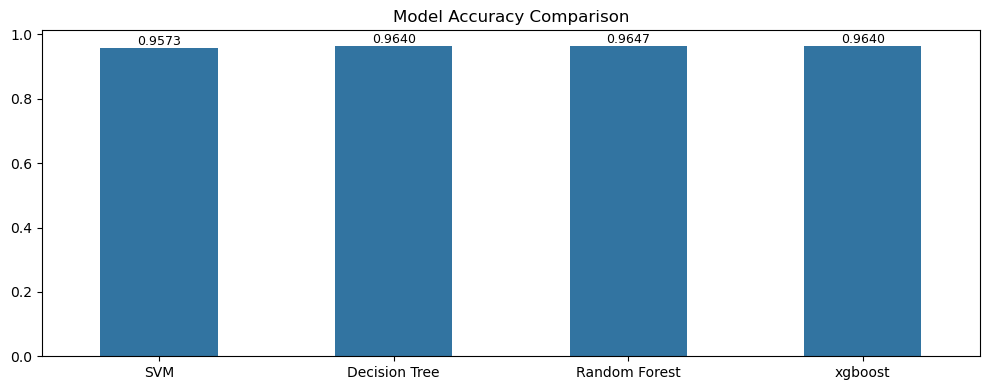

In [107]:
plt.figure(figsize=(10, 4))
bar_plot = sns.barplot(x=models, y=accuracy_scores,width=0.5)
plt.title('Model Accuracy Comparison')

# Add labels to the top of each bar
for index, value in enumerate(accuracy_scores):
    bar_plot.text(index, value + 0.001, f'{value:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Model Comparison Report

Using **Random Forest**, we achieved the highest accuracy score of **96.47%**, demonstrating its strong predictive ability. **Decision Tree** and **XGBoost** also performed well with **96.40%** accuracy, while **SVM** had a slightly lower accuracy of **95.73%**.

For regression models, **Linear Regression** resulted in an **MSE of 0.2406**, **RMSE of 0.4905**, **MAE of 0.4832**, and an **R² score of -5.6836**, indicating poor performance. On the classification side, **logistic regression** achieved an accuracy score of **62.35%**, which is significantly lower than the other models.

Therefore, we can select **Random Forest** as the ideal choice for production. By integrating this model into the system, businesses can make more accurate predictions, improve decision-making, and enhance overall efficiency.

## Report on Challenges faced

### 1. Too Many Features
##### Problem: 
High Dimensionality 
##### Solution: 
I selected only the most relevant 10 features from the dataset.
##### Why: 
High-dimensional data can make models more complex and prone to overfitting, where they perform well on training data but poorly on new data. By reducing the number of features, the model focuses on the most important information, making it simpler and more efficient. This also speeds up the training process, as the model has fewer features to process.

### 2. High Computation Time
##### Problem:
Long Computation Time
##### Solution:
I worked with a smaller subset of 5,000 rows instead of using the full 595,212 rows.
##### Why:
Training models on a large dataset can be very time-consuming and require substantial memory. By using a smaller sample, I reduced the computation time significantly without sacrificing the core patterns in the data. This made it possible to quickly test and tune models without waiting too long for results, allowing me to focus on key insights.

### 3. One Class is Much Larger
##### Problem:
Class Imbalance (One Class is Much Larger)
##### Solution:
I applied SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic data for the minority class.
##### Why:
When the dataset has an imbalance between classes (e.g., one class is much larger than the other), the model may be biased toward predicting the majority class, leading to poor performance on the minority class. SMOTE helps by creating synthetic samples for the minority class, improving the model's ability to learn patterns for both classes and thus making the model more accurate and balanced.

## Suggestions to the Insurance market team to make  customers  buy the product

### 1. Personalize Policy Pricing

* Use ML-driven claim probability scores to tailor premiums for each driver.
* Reward cautious drivers with discounts, loyalty bonuses, or safe-driving rewards.
* Offer customized add-ons (e.g., roadside assistance, accident coverage) based on predicted risk.

### 2. Enhance Customer Engagement

* Provide interactive dashboards where customers can view their claim probability and risk profile.
* Send proactive notifications (e.g., safe driving tips, reminders) to reduce claim likelihood.
* Run gamified challenges (e.g., “Zero Claim Bonus Tracker”) to encourage responsible driving.

### 3. Build Transparency & Trust

* Clearly explain how premiums are calculated using data and ML models.
* Share aggregate insights (e.g., "70% of safe drivers reduced premiums this year").
* Introduce educational campaigns about how insurance pricing works.

### 4. Simplify the Buying Journey

* Offer quick, AI-assisted quote generation based on minimal inputs.
* Enable one-click renewals and digital claim filing with instant status tracking.
* Provide 24/7 chatbot support to answer customer questions in real time.

### 5. Leverage Social Proof & Branding

* Promote real customer success stories where predictive pricing saved money.
* Collaborate with influencers to simplify insurance concepts for young buyers.
* Highlight company innovation (use of AI/ML) as a brand differentiator.

By adopting these strategies, insurers can **attract new customers, improve retention, and build stronger trust**, while also **leveraging predictive models** to deliver fair and personalized insurance experiences. remove inside highligthing

## Project summary
* This dataset has high dimensionality and high computational time
* So I did some feature selection and clustering to reduce computational time
* Random Forest model has high accuracy among other models
* Until linear and logistic regression I have used the exact dataset for the model which means no feature engineering
* I have used SVM, KMeans, Decision tree, Random forest, Logistic regression, XGBoost, and Linear regression